Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import joblib
from sklearn.utils import resample
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
from sklearn.model_selection import train_test_split

تنظیمات اولیه برای نمودارها

In [2]:
plt.style.use('ggplot')
sns.set_palette('pastel')

Load Data and Model

In [3]:
model_ready_data = pd.read_csv(r"E:\data analysis project\InstacartMarketBasketAnalysisPortflio\data\processed\model_ready_data.csv")

In [4]:
# حذف کلیه ستون‌های غیرضروری
X = model_ready_data.drop(columns=['reordered', 'eval_set', 'product_name']) 
y = model_ready_data['reordered']

In [5]:
# انتخاب ۲۰ درصد نمونه‌ها به‌صورت تصادفی با حفظ ساختار DataFrame
X_sampled, y_sampled = resample(
    X, 
    y, 
    n_samples=int(len(X) * 0.2),  # انتخاب ۲۰ درصد نمونه‌ها
    random_state=42,              # تنظیم seed برای تکرارپذیری
    stratify=y                    # حفظ تعادل کلاس‌ها
)

In [6]:
# تقسیم داده‌های نمونه‌برداری‌شده به مجموعه‌های آموزش و آزمون
X_train, X_test, y_train, y_test = train_test_split(
    X_sampled, 
    y_sampled, 
    test_size=0.2,
    random_state=42
)

In [7]:
model_path = r'E:\data analysis project\InstacartMarketBasketAnalysisPortflio\models\optimized_model.pkl'
trained_model = joblib.load(model_path)

Generate Predictions

In [8]:
# پیش‌بینی بر روی داده‌های آزمون
y_pred = trained_model.predict(X_test)
y_prob = trained_model.predict_proba(X_test)[:, 1]  # احتمالات کلاس مثبت

Classification Report

In [9]:
# چاپ گزارش طبقه‌بندی
print("\n" + "="*40)
print("Classification Report:")
print("="*40)
print(classification_report(y_test, y_pred, target_names=['Not Reordered', 'Reordered']))


Classification Report:
               precision    recall  f1-score   support

Not Reordered       0.76      0.52      0.62    532955
    Reordered       0.73      0.89      0.80    764425

     accuracy                           0.74   1297380
    macro avg       0.74      0.70      0.71   1297380
 weighted avg       0.74      0.74      0.72   1297380



Confusion Matrix Visualization

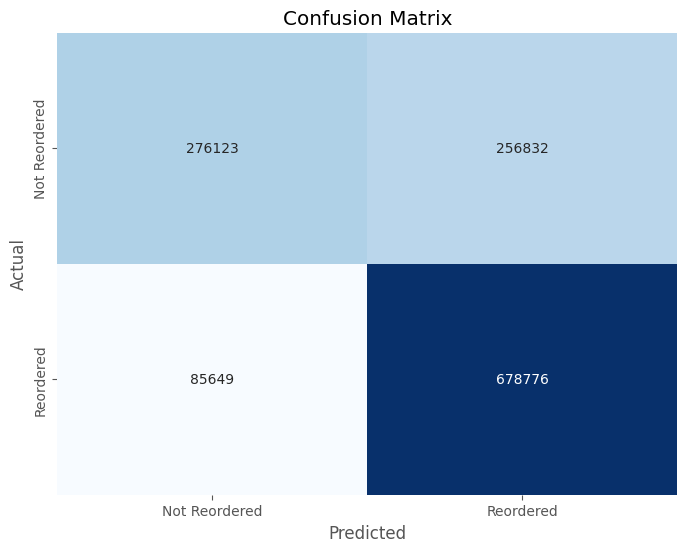

In [12]:
# رسم ماتریس درهم‌ریختگی
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Reordered', 'Reordered'],
            yticklabels=['Not Reordered', 'Reordered'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.savefig(r"E:\data analysis project\InstacartMarketBasketAnalysisPortflio\reports\figures\confusion_matrix.png", dpi=300, bbox_inches='tight')
plt.show()

 Feature Importance

In [13]:
# استخراج اهمیت ویژگی‌ها
feature_importance = pd.Series(trained_model.feature_importances_, index=X_test.columns)
top_features = feature_importance.sort_values(ascending=False).head(10)

C:\Users\Asus\AppData\Local\Temp\ipykernel_2900\451853151.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette='viridis')


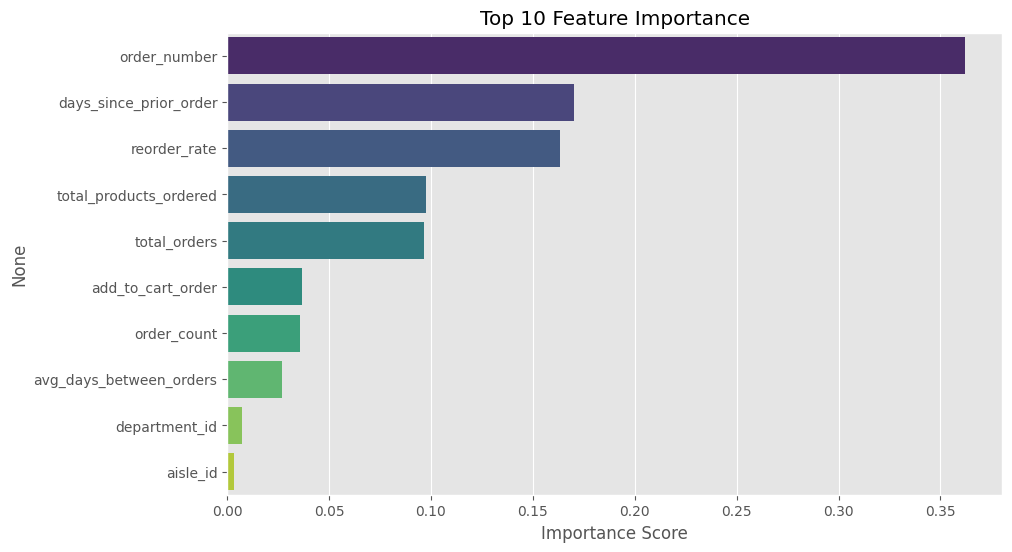

In [14]:
# رسم نمودار اهمیت ویژگی‌ها
plt.figure(figsize=(10, 6))
sns.barplot(x=top_features.values, y=top_features.index, palette='viridis')
plt.xlabel('Importance Score')
plt.title('Top 10 Feature Importance')
plt.savefig(r"E:\data analysis project\InstacartMarketBasketAnalysisPortflio\reports\figures\feature_importance.png", dpi=300, bbox_inches='tight')
plt.show()

ROC Curve (Optional)

In [17]:
from sklearn.metrics import roc_curve, auc

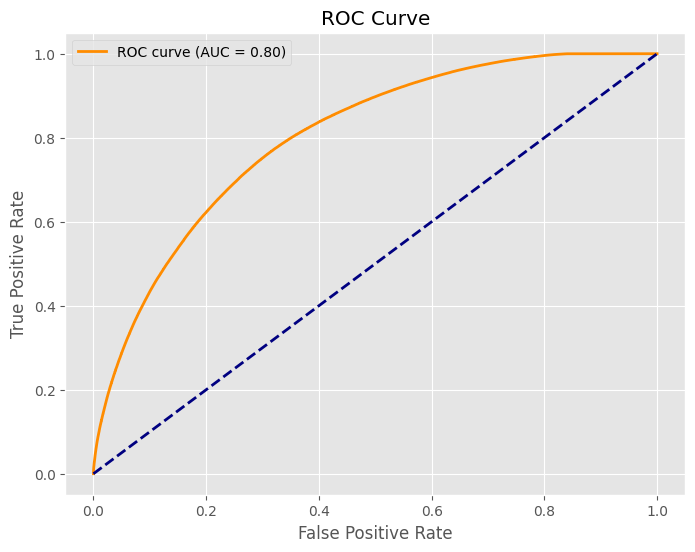

In [18]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.savefig(r"E:\data analysis project\InstacartMarketBasketAnalysisPortflio\reports\figures\roc_curve.png", dpi=300, bbox_inches='tight')
plt.show()